In [1]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database
!unzip pima-indians-diabetes-database.zip
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv("diabetes.csv")
mask = df['BloodPressure'] != 0  # we remove the missing data for diastolic pressure
df = df[mask]

Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 8.40MB/s]
Archive:  pima-indians-diabetes-database.zip
  inflating: diabetes.csv            


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 733 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               733 non-null    int64  
 1   Glucose                   733 non-null    int64  
 2   BloodPressure             733 non-null    int64  
 3   SkinThickness             733 non-null    int64  
 4   Insulin                   733 non-null    int64  
 5   BMI                       733 non-null    float64
 6   DiabetesPedigreeFunction  733 non-null    float64
 7   Age                       733 non-null    int64  
 8   Outcome                   733 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 57.3 KB


In [3]:
from sklearn import neighbors

In [54]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,155.548223,33.6,0.627,50,1
1,1,85,66,29,155.548223,26.6,0.351,31,0
2,8,183,64,0,155.548223,23.3,0.672,32,1
3,1,89,66,23,94.000000,28.1,0.167,21,0
4,0,137,40,35,168.000000,43.1,2.288,33,1


In [5]:
df[df['Insulin'] != 0]['Insulin'].mean()

155.5482233502538

In [6]:
df.loc[df['Insulin'] == 0, 'Insulin'] = df[df['Insulin'] != 0]['Insulin'].mean()  # zamiana 0 w polu Insulin na wartosci srednie Insulin, ale bez zer

<ipython-input-6-8a57d7874cf6>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '155.5482233502538' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Insulin'] == 0, 'Insulin'] = df[df['Insulin'] != 0]['Insulin'].mean()  # zamiana 0 w polu Insulin na wartosci srednie Insulin, ale bez zer


In [55]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,155.548223,33.6,0.627,50,1
1,1,85,66,29,155.548223,26.6,0.351,31,0
2,8,183,64,0,155.548223,23.3,0.672,32,1
3,1,89,66,23,94.000000,28.1,0.167,21,0
4,0,137,40,35,168.000000,43.1,2.288,33,1


In [8]:
(df['Insulin'] != 0).mean()

1.0

In [9]:
from sklearn import model_selection
from sklearn import preprocessing

In [10]:
target = "Outcome"
X, y = df.drop(columns=target), df[target]
scaler = preprocessing.StandardScaler()
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=999)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
clf = neighbors.KNeighborsClassifier()  #
clf.fit(X_train, y_train)
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.8087431693989071, 0.75)

In [11]:
from tqdm import tqdm

In [12]:
score_train = []
score_test = []
k = range(1,100)
for i in tqdm(k):
    clf = neighbors.KNeighborsClassifier(i)
    clf.fit(X_train, y_train)
    score_train.append(clf.score(X_train, y_train))
    score_test.append(clf.score(X_test, y_test))

100%|██████████| 99/99 [00:07<00:00, 14.07it/s]


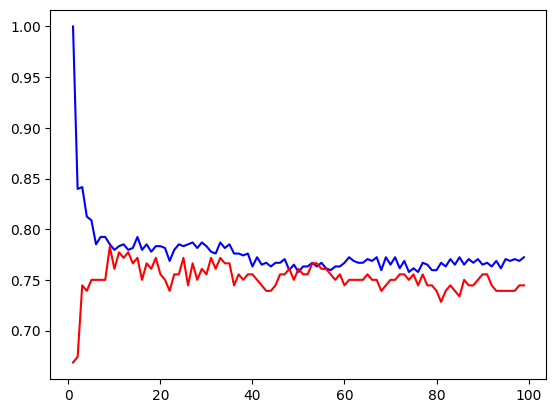

In [13]:
plt.plot(k, score_train, c='blue')
plt.plot(k, score_test, c='red')
plt.show()

In [14]:
k = 10
clf = neighbors.KNeighborsClassifier( n_neighbors=k)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)  # accuracy

0.7608695652173914

In [15]:
(clf.predict(X_test) == y_test).mean()

0.7608695652173914

In [16]:
len(X)

733

In [17]:
df['Outcome'].value_counts()

,count
Outcome,
0,481
1,252


# Classification tree

In [18]:
from sklearn import tree

In [19]:
X.mean()

,0
Pregnancies,3.855389
Glucose,121.042292
BloodPressure,72.405184
SkinThickness,21.444748
Insulin,155.548223
BMI,32.292769
DiabetesPedigreeFunction,0.475861
Age,33.361528


In [20]:
target = "Outcome"
X, y = df.drop(columns=[target, 'DiabetesPedigreeFunction']), df[target]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=999)
clf_tree = tree.DecisionTreeClassifier(random_state=1, min_samples_leaf=20) # max_depth=6
clf_tree.fit(X_train, y_train)
clf_tree.score(X_train, y_train), clf_tree.score(X_test, y_test)

(0.8142076502732241, 0.7391304347826086)

In [21]:
import graphviz

In [22]:
classes_ = [str(item) for item in clf_tree.classes_]
classes_

['0', '1']

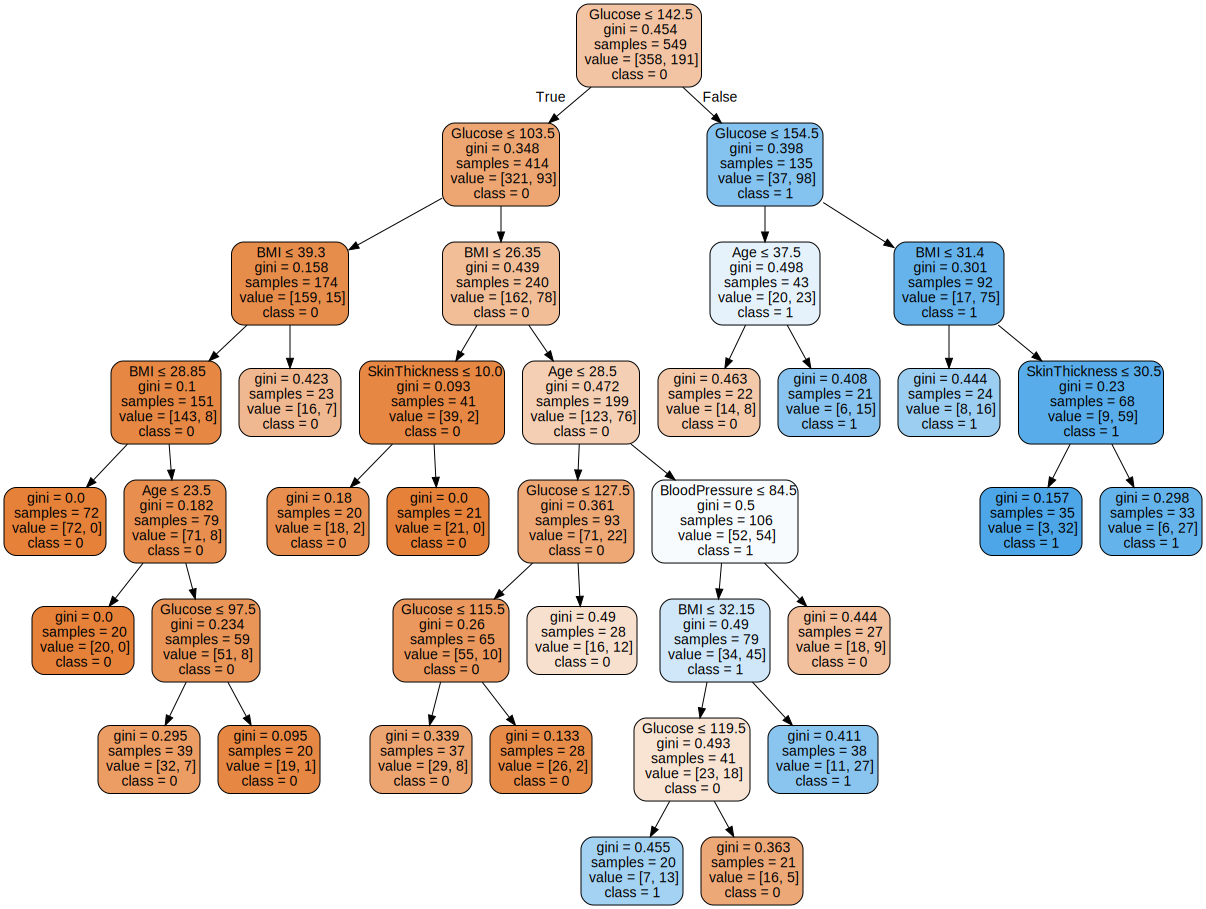

In [23]:
dot_data = tree.export_graphviz(clf_tree, out_file=None,
                     feature_names=X.columns,
                     class_names=classes_,
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("drzewo_cukrzyca")
graph

#**Random forest**

In [24]:
from sklearn import ensemble

In [26]:
target = "Outcome"
X, y = df.drop(columns=[target, 'DiabetesPedigreeFunction']), df[target]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=999)
clf_rf = ensemble.RandomForestClassifier(random_state=1, min_samples_leaf=20)
clf_rf.fit(X_train, y_train)
clf_rf.score(X_train, y_train), clf_rf.score(X_test, y_test)

(0.7978142076502732, 0.7445652173913043)

In [27]:
from tqdm import tqdm

In [28]:
for i in range(1,10):
    for k in range(1,10):
        target = "Outcome"
        X, y = df.drop(columns=[target, 'DiabetesPedigreeFunction']), df[target]
        X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=999)
        clf = ensemble.RandomForestClassifier(n_estimators=i, n_jobs=k, random_state=1)
        clf.fit(X_train, y_train)
        print('n_estimators:', i, 'n_jobs:', k, clf.score(X_train, y_train), clf.score(X_test, y_test))

n_estimators: 1 n_jobs: 1 0.9016393442622951 0.7065217391304348
n_estimators: 1 n_jobs: 2 0.9016393442622951 0.7065217391304348
n_estimators: 1 n_jobs: 3 0.9016393442622951 0.7065217391304348
n_estimators: 1 n_jobs: 4 0.9016393442622951 0.7065217391304348
n_estimators: 1 n_jobs: 5 0.9016393442622951 0.7065217391304348
n_estimators: 1 n_jobs: 6 0.9016393442622951 0.7065217391304348
n_estimators: 1 n_jobs: 7 0.9016393442622951 0.7065217391304348
n_estimators: 1 n_jobs: 8 0.9016393442622951 0.7065217391304348
n_estimators: 1 n_jobs: 9 0.9016393442622951 0.7065217391304348
n_estimators: 2 n_jobs: 1 0.9052823315118397 0.6847826086956522
n_estimators: 2 n_jobs: 2 0.9052823315118397 0.6847826086956522
n_estimators: 2 n_jobs: 3 0.9052823315118397 0.6847826086956522
n_estimators: 2 n_jobs: 4 0.9052823315118397 0.6847826086956522
n_estimators: 2 n_jobs: 5 0.9052823315118397 0.6847826086956522
n_estimators: 2 n_jobs: 6 0.9052823315118397 0.6847826086956522
n_estimators: 2 n_jobs: 7 0.905282331511

In [56]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,155.548223,33.6,0.627,50,1
1,1,85,66,29,155.548223,26.6,0.351,31,0
2,8,183,64,0,155.548223,23.3,0.672,32,1
3,1,89,66,23,94.000000,28.1,0.167,21,0
4,0,137,40,35,168.000000,43.1,2.288,33,1


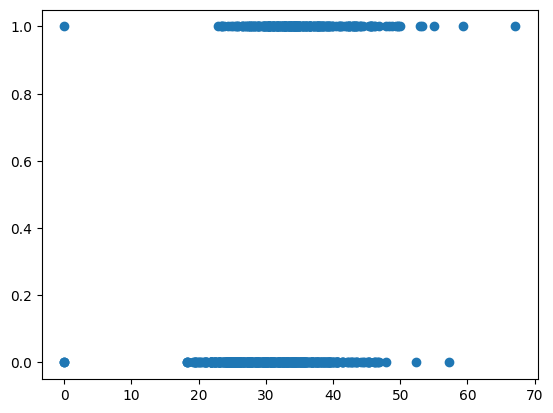

In [30]:
plt.scatter(df['BMI'], df['Outcome'])
plt.show()

In [31]:
import numpy as np

In [32]:
p = 0.5
p/(1-p), np.log(np.array([p/(1-p)]))

(1.0, array([0.]))

In [35]:
p = 0.8
p/(1-p)

4.000000000000001

In [36]:
from sklearn import linear_model

In [37]:
clf_logistic = linear_model.LogisticRegression()

In [38]:
target = "Outcome"
X, y = df.drop(columns=[target, 'DiabetesPedigreeFunction']), df[target]
scaler = preprocessing.StandardScaler()
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=999)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
clf_logistic = linear_model.LogisticRegression()
clf_logistic.fit(X_train, y_train)
clf_logistic.score(X_train, y_train), clf_logistic.score(X_test, y_test)

(0.7832422586520947, 0.7391304347826086)

In [39]:
clf_logistic.intercept_, clf_logistic.coef_

(array([-0.86676452]),
 array([[ 0.28539117,  1.08444134, -0.11900869,  0.00499105,  0.01398913,
          0.62871077,  0.23716171]]))

In [40]:
X_test

array([[-0.84293933, -1.28404742,  0.1246385 , ..., -1.11215689,
        -0.38019402, -0.95776207],
       [-0.24887811,  1.27299255, -0.18852642, ..., -0.57580864,
        -0.1505561 , -0.44318561],
       [ 1.23627495,  1.67349279,  1.37729818, ...,  1.74836712,
         0.15084367,  2.12969667],
       ...,
       [ 1.23627495, -0.39062381,  0.28122096, ..., -0.46853898,
        -0.68159378, -0.18589738],
       [ 0.34518311, -0.39062381,  0.20292973, ...,  0.02666806,
         0.48094817,  2.30122215],
       [-1.13996994, -0.54466236,  0.28122096, ...,  0.02666806,
        -2.04506892, -0.52894835]])

In [41]:
y_test

,Outcome
432,0
515,1
53,1
513,0
399,1
...,...
765,0
359,1
188,1
30,0


In [42]:
clf_logistic.predict_proba(X_test)

array([[0.95256304, 0.04743696],
       [0.43631947, 0.56368053],
       [0.1461506 , 0.8538494 ],
       [0.93503938, 0.06496062],
       [0.18129122, 0.81870878],
       [0.84211951, 0.15788049],
       [0.91361694, 0.08638306],
       [0.23496652, 0.76503348],
       [0.78446736, 0.21553264],
       [0.88798536, 0.11201464],
       [0.92673768, 0.07326232],
       [0.89258512, 0.10741488],
       [0.63300905, 0.36699095],
       [0.83507832, 0.16492168],
       [0.61042442, 0.38957558],
       [0.28947596, 0.71052404],
       [0.62052932, 0.37947068],
       [0.87424036, 0.12575964],
       [0.9719047 , 0.0280953 ],
       [0.89681049, 0.10318951],
       [0.42081428, 0.57918572],
       [0.59098164, 0.40901836],
       [0.98145589, 0.01854411],
       [0.93160601, 0.06839399],
       [0.29481564, 0.70518436],
       [0.63381206, 0.36618794],
       [0.97022978, 0.02977022],
       [0.45400988, 0.54599012],
       [0.53944083, 0.46055917],
       [0.49927187, 0.50072813],
       [0.

# **Model Summary**

In [43]:
target = "Outcome"
X, y = df.drop(columns=[target, 'DiabetesPedigreeFunction']), df[target]
scaler = preprocessing.StandardScaler()
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [44]:
from sklearn import svm

In [45]:
clf_list = [linear_model.LogisticRegression(),
            tree.DecisionTreeClassifier(random_state=321),
            ensemble.RandomForestClassifier(min_samples_leaf=20, random_state=123),
            neighbors.KNeighborsClassifier(n_neighbors=10),
            svm.SVC()
            ]

In [46]:
for clf in clf_list:
  clf.fit(X_train, y_train) # 5
  print(clf, clf.score(X_train, y_train), clf.score(X_test, y_test))

LogisticRegression() 0.7795992714025501 0.7554347826086957
DecisionTreeClassifier(random_state=321) 1.0 0.6630434782608695
RandomForestClassifier(min_samples_leaf=20, random_state=123) 0.785063752276867 0.7391304347826086
KNeighborsClassifier(n_neighbors=10) 0.7959927140255009 0.7282608695652174
SVC() 0.8142076502732241 0.7336956521739131


# **SVM**


In [47]:
clf_svm = svm.SVC(kernel='rbf', gamma=0.3 ) # C, gamma, degree, kernels
clf_svm.fit(X_train, y_train) # 5
print(clf_svm.score(X_train, y_train), clf_svm.score(X_test, y_test))

0.8633879781420765 0.7228260869565217


In [48]:
clf_svm = svm.SVC(kernel='linear') # C, gamma, degree, kernels
clf_svm.fit(X_train, y_train) # 5
print(clf_svm.score(X_train, y_train), clf_svm.score(X_test, y_test))

0.7723132969034608 0.7608695652173914


In [49]:
clf_svm = svm.SVC(kernel='rbf', gamma=0.3, degree=200) # C, gamma, degree, kernels
clf_svm.fit(X_train, y_train) # 5
print(clf_svm.score(X_train, y_train), clf_svm.score(X_test, y_test))

0.8633879781420765 0.7228260869565217


In [50]:
clf_svm = svm.SVC(kernel='rbf', gamma=0.1) # C, gamma, degree, kernels
clf_svm.fit(X_train, y_train) # 5
print(clf_svm.score(X_train, y_train), clf_svm.score(X_test, y_test))

0.8032786885245902 0.7391304347826086


In [51]:
clf_svm = svm.SVC(kernel='rbf', gamma=0.3, C=0.00001) # C, gamma, degree, kernels
clf_svm.fit(X_train, y_train) # 5
print(clf_svm.score(X_train, y_train), clf_svm.score(X_test, y_test))

0.6520947176684881 0.6684782608695652


In [52]:
clf_svm = svm.SVC(kernel='rbf', gamma=0.3, C=1000) # C, gamma, degree, kernels
clf_svm.fit(X_train, y_train) # 5
print(clf_svm.score(X_train, y_train), clf_svm.score(X_test, y_test))

1.0 0.6739130434782609


In [53]:
clf_svm = svm.SVC(kernel='linear', C=1000) # C, gamma, degree, kernels
clf_svm.fit(X_train, y_train) # 5
print(clf_svm.score(X_train, y_train), clf_svm.score(X_test, y_test))

clf_svm = svm.SVC(kernel='linear', C=0.0000001) # C, gamma, degree, kernels
clf_svm.fit(X_train, y_train) # 5
print(clf_svm.score(X_train, y_train), clf_svm.score(X_test, y_test))

0.7723132969034608 0.7608695652173914
0.6520947176684881 0.6684782608695652
